In [2]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [4]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestDebug/'

In [5]:

fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [6]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [7]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'ATF_DIAT', 'ATF_MYRI', 'ATF_PHY', 'ATF_MICZ', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -2.4161732 2.0754504
ATF_NH4 : -0.56770843 1.7759498
ATF_DON : -0.47563046 0.85519034
ATF_PON : -3.6197355 2.9023535
ATF_LIV : -4.230829 3.2096367
ATF_DIAT : -3.6191323 3.0823498
ATF_MYRI : -2.07993e-09 2.3066014e-09
ATF_PHY : -0.8943537 0.10892466
ATF_MICZ : -0.20845012 0.28265733
BFX_PON : -0.00018893112 -0.0
BFX_DIAT : -2.2604485e-05 -0.0


In [8]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'PHS_DIAT', 'PHS_MYRI', 'PHS_PHY', 'PHS_MICZ', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV', 'SMS_DIAT', 'SMS_MYRI', 'SMS_PHY', 'SMS_MICZ'])
Min/Max:
PHS_NO3 : -437.6063 383.81223
PHS_NH4 : -61.002792 64.72221
PHS_DON : -48.269497 59.22118
PHS_PON : -30.01169 36.59474
PHS_LIV : -78.68599 80.143776
PHS_DIAT : -51.339317 51.78845
PHS_MYRI : -5.5804554e-07 4.1688386e-07
PHS_PHY : -14.075735 17.412664
PHS_MICZ : -18.883997 20.303276
SMS_NO3 : -21.748274 9.581778
SMS_NH4 : -5.115639 16.001923
SMS_DON : -4.2821913 7.722708
SMS_PON : -6.4425325 11.967412
SMS_LIV : -39.890717 17.814753
SMS_DIAT : -34.396873 17.011114
SMS_MYRI : -1.7991958e-08 2.0759977e-08
SMS_PHY : -8.046324 0.97915083
SMS_MICZ : -1.8930135 2.5524833


In [9]:
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*(fD.variables['ATF_NO3'][:,:,:,:]+fD.variables['ATF_NH4']+\
            fD.variables['ATF_PON']+fD.variables['ATF_DON']+fD.variables['ATF_LIV']),3),2),1)

In [10]:
afiltSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NH4'],3),2),1)
afiltSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_PON'],3),2),1)
afiltSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_DON'],3),2),1)
afiltSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_LIV'],3),2),1)

In [11]:
smsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NO3'],3),2),1)
smsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NH4'],3),2),1)
smsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_PON'],3),2),1)
smsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_DON'],3),2),1)
smsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_LIV'],3),2),1)

In [12]:
phsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NO3'],3),2),1)
phsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NH4'],3),2),1)
phsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_PON'],3),2),1)
phsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_DON'],3),2),1)
phsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_LIV'],3),2),1)

In [13]:
np.shape(e1t)

(1, 1, 898, 398)

In [14]:
bfxSumPON=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_PON'],2),1)
bfxSumDIAT=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_DIAT'],2),1)

In [15]:
fS=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_snp_T_20150501-20150505.nc')

In [16]:
checkall(fS)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP', 'DIAT_E3TSNAP', 'MYRI_E3TSNAP', 'PHY_E3TSNAP', 'MICZ_E3TSNAP'])
Min/Max:
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NO3_E3TSNAP : 0.0 962.8308
NH4_E3TSNAP : 0.0 75.641525
PON_E3TSNAP : 0.0 28.147413
DON_E3TSNAP : 0.0 51.221718
LIV_E3TSNAP : 0.0 69.579895
DIAT_E3TSNAP : 0.0 38.2861
MYRI_E3TSNAP : 0.0 2.708079e-07
PHY_E3TSNAP : 0.0 13.452974
MICZ_E3TSNAP : 0.0 20.351053


In [17]:
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP', 'DIAT_E3TSNAP', 'MYRI_E3TSNAP', 'PHY_E3TSNAP', 'MICZ_E3TSNAP'])

In [18]:
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nh4Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1)
ponSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['PON_E3TSNAP'][:,:,:,:],3),2),1)
donSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['DON_E3TSNAP'][:,:,:,:],3),2),1)
livSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1)

In [19]:
livSum

masked_array(data=[980941672636.5259, 1028809564482.9664,
                   1078850954342.7689, 1099359644061.9604,
                   1074207338419.0791],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [20]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
nh4diff=(nh4Sum[1:]-nh4Sum[:-1])/(24*3600)
pondiff=(ponSum[1:]-ponSum[:-1])/(24*3600)
dondiff=(donSum[1:]-donSum[:-1])/(24*3600)
livdiff=(livSum[1:]-livSum[:-1])/(24*3600)

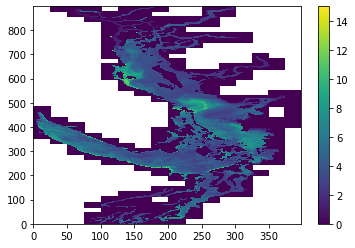

In [21]:
plt.pcolormesh(fS.variables['LIV_E3TSNAP'][0,0,:,:])
plt.colorbar()

Text(0.5, 1.0, 'DON')

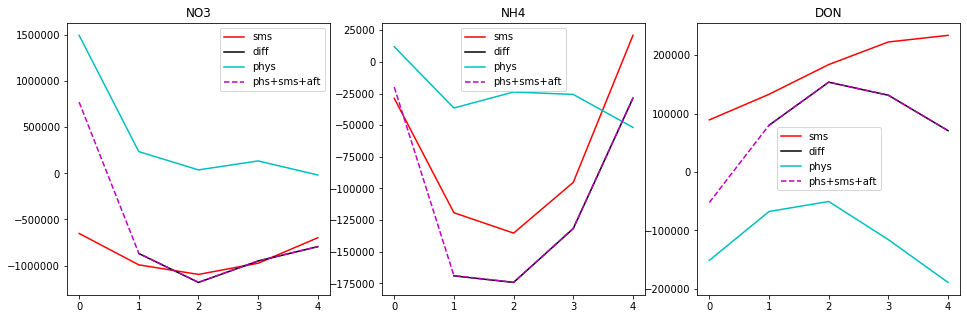

In [22]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(0,5),smsSumNO3,'r-',label='sms')
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),phsSumNO3,'c-',label='phys')
ax[0].plot(range(0,5),phsSumNO3+smsSumNO3+afiltSumNO3,'m--',label='phs+sms+aft')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(0,5),smsSumNH4,'r-',label='sms')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),phsSumNH4,'c-',label='phys')
ax[1].plot(range(0,5),phsSumNH4+smsSumNH4+afiltSumNH4,'m--',label='phs+sms+aft')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(0,5),smsSumDON,'r-',label='sms')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),phsSumDON,'c-',label='phys')
ax[2].plot(range(0,5),phsSumDON+smsSumDON+afiltSumDON,'m--',label='phs+sms+aft')
ax[2].legend()
ax[2].set_title('DON')

Text(0.5, 1.0, 'Liv')

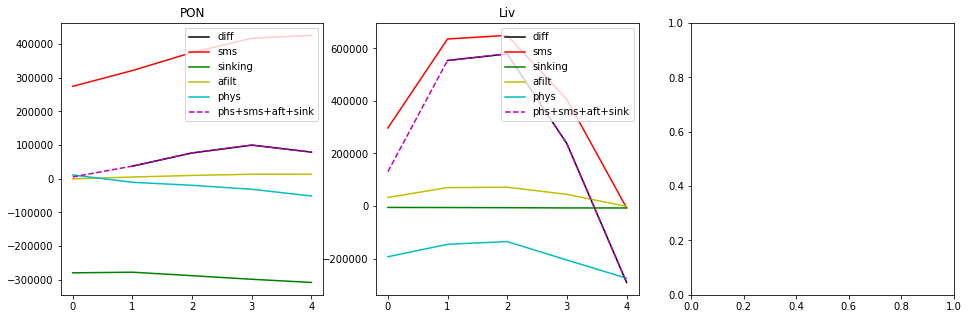

In [23]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),pondiff,'k-',label='diff')
ax[0].plot(range(0,5),smsSumPON,'r-',label='sms')
ax[0].plot(range(0,5),bfxSumPON,'g-',label='sinking')
ax[0].plot(range(0,5),afiltSumPON,'y-',label='afilt')
ax[0].plot(range(0,5),phsSumPON,'c-',label='phys')
ax[0].plot(range(0,5),phsSumPON+smsSumPON+afiltSumPON+bfxSumPON,'m--',label='phs+sms+aft+sink')
ax[0].legend()
ax[0].set_title('PON')
ax[1].plot(range(1,5),livdiff,'k-',label='diff')
ax[1].plot(range(0,5),smsSumLiv,'r-',label='sms')
ax[1].plot(range(0,5),bfxSumDIAT,'g-',label='sinking')
ax[1].plot(range(0,5),afiltSumLiv,'y-',label='afilt')
ax[1].plot(range(0,5),phsSumLiv,'c-',label='phys')
ax[1].plot(range(0,5),phsSumLiv+smsSumLiv+afiltSumLiv+bfxSumDIAT,'m--',label='phs+sms+aft+sink')
ax[1].legend()
ax[1].set_title('Liv')

In [24]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)
    malUANH4=np.sum(np.sum(f.variables['ATX_NH4'][:,:,:,0],2),1)
    malUDNH4=np.sum(np.sum(f.variables['DTX_NH4'][:,:,:,0],2),1)
    malUADON=np.sum(np.sum(f.variables['ATX_DON'][:,:,:,0],2),1)
    malUDDON=np.sum(np.sum(f.variables['DTX_DON'][:,:,:,0],2),1)
    malUAPON=np.sum(np.sum(f.variables['ATX_PON'][:,:,:,0],2),1)
    malUDPON=np.sum(np.sum(f.variables['DTX_PON'][:,:,:,0],2),1)
    malUALiv=np.sum(np.sum(f.variables['ATX_LIV'][:,:,:,0],2),1)
    malUDLiv=np.sum(np.sum(f.variables['DTX_LIV'][:,:,:,0],2),1)

In [31]:
malUANH4

masked_array(data=[-22856.127, -28549.045, -23912.305, -16145.662,
                   -24972.957],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [33]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    harVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,:,0],2),1)
    harVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,:,0],2),1)
    harVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,:,0],2),1)
    harVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,:,0],2),1)
    harVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,:,0],2),1)
    harVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,:,0],2),1)
    harVALiv=np.sum(np.sum(f.variables['ATY_LIV'][:,:,:,0],2),1)
    harVDLiv=np.sum(np.sum(f.variables['DTY_LIV'][:,:,:,0],2),1)

In [34]:
harVANH4

masked_array(data=[0., 0., 0., 0., 0.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [26]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [27]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [28]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

In [29]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)

NameError: name 'PHSSumNO3' is not defined

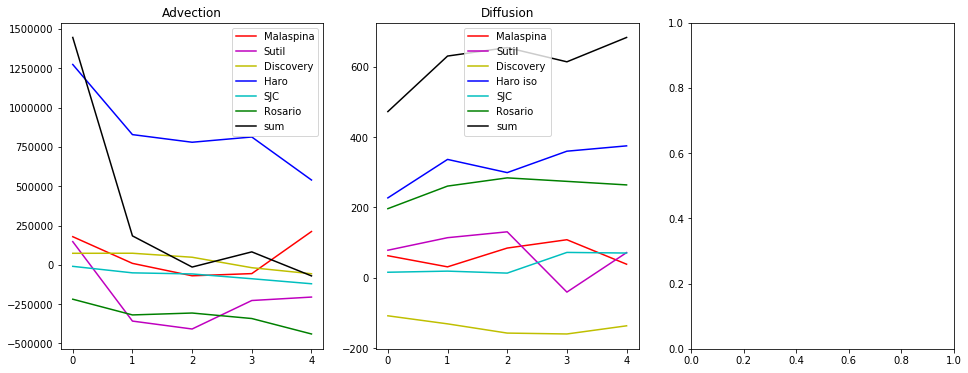

In [30]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),PHSSumNO3,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSum[0],'k*')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [ ]:
adv[0],dif[0],rivSum[0],adv[0]+dif[0],adv[0]+dif[0]+rivSum[0],physSum[0]

In [ ]:
## phys difference
adv+dif+rivSum-physSum

In [ ]:
#old file, day 1:
f0=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1d_20150501_20150501_ptrc_T.nc')
# old file, day 5:
f4=nc.Dataset('/results/SalishSea/nowcast-green.201812/05may15/SalishSea_1d_20150505_20150505_ptrc_T.nc')
# new file:
f=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_ptrc_T_20150501-20150505.nc')

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
iax=ax[0]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['NO3'][4,0,:,:]/f4.variables['nitrate'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n NO3')

iax=ax[1]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['DIAT'][4,0,:,:]/f4.variables['diatoms'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n diatoms')

iax=ax[2]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['PON'][4,0,:,:]/f4.variables['particulate_organic_nitrogen'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n PON')

iax=ax[3]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['Si'][4,0,:,:]/f4.variables['silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n Si')

iax=ax[4]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['bSi'][4,0,:,:]/f4.variables['biogenic_silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n bSi')

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(f0.variables['diatoms'][0,:,jj,ii],-1*f0.variables['deptht'][:],'k-',alpha=.1)
        ax[4].plot(f4.variables['diatoms'][0,:,jj,ii],-1*f0.variables['deptht'][:],'k-',alpha=.1)
for jj in range(455,460): #range(450,475):
    for ii in range(265,270): #range(260,275):
        ax[0].plot(f.variables['DIAT'][0,:,jj,ii],-1*f.variables['deptht'][:])
        ax[1].plot(f.variables['DIAT'][1,:,jj,ii],-1*f.variables['deptht'][:])
        ax[2].plot(f.variables['DIAT'][2,:,jj,ii],-1*f.variables['deptht'][:])
        ax[3].plot(f.variables['DIAT'][3,:,jj,ii],-1*f.variables['deptht'][:])
        ax[4].plot(f.variables['DIAT'][4,:,jj,ii],-1*f.variables['deptht'][:])
for iax in ax:
    iax.set_ylim(-100,0)
print('Input sinking rate: 0.5 -- 1.2 m/d')
z0=np.mean(np.mean(np.nansum(f.variables['DIAT'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][0,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z1=np.mean(np.mean(np.nansum(f.variables['DIAT'][1,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][1,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z2=np.mean(np.mean(np.nansum(f.variables['DIAT'][2,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][2,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z3=np.mean(np.mean(np.nansum(f.variables['DIAT'][3,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][3,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
z4=np.mean(np.mean(np.nansum(f.variables['DIAT'][4,:,455:460,265:270]*e3t_0[0,:,455:460,265:270]*np.reshape(f.variables['deptht'][:],(40,1,1)),0)/np.sum(f.variables['DIAT'][4,:,455:460,265:270]*e3t_0[0,:,455:460,265:270],0)))
print(z1,z2,z3,z4)
print('Diagnosed sinking rate: ',(z4-z0)/4,'m/d')